In [14]:
import torch
import sys
sys.path.append('..')
sys.path.append('../..')
from utils import *
from model import *
from data import *
import numpy as np
import matplotlib.pyplot as plt

working_dir = f'/home/zhiqin/data/LLM/LLM_pami/LLM_init_exact/nh_1_nl_2_data_90w_train_last_token_composition_GPT_normal_init_without_34/GPT_normal_init_std_0.8/composition-N_900000-seed1_wd_0.01'
state_dict=torch.load(f'{working_dir}/model/model_60.pt')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
args = load_args(f'{working_dir}/config.json')

# model = myGPT(args, device)
model = myGPT_specific_test_for_resnet(args, device)
model.load_state_dict(state_dict)
model.to(device)
pair_lst=[]

for i in range(40,80):
    pair_lst.append([i-5, 1])
    pair_lst.append([i-1, 2])
    pair_lst.append([i+2, 3])
    pair_lst.append([i+8, 4])

vec_lst=[]

for [x, i1] in pair_lst:
    seq = [35, 63,x, i1,2, 38, 42, 36, 62]
    dec_logits, _ = model(torch.tensor([seq[:9]]).to(device))

    vec=dec_logits[0, -1, :].detach().cpu().numpy()
    
    
    
    vec_lst.append(vec)


from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_emd = cosine_similarity(vec_lst)

print(similarity_matrix_emd)

[[0.9999998  0.9170348  0.9327502  ... 0.41814435 0.34554794 0.24642442]
 [0.9170348  1.         0.91438264 ... 0.43691903 0.34457532 0.23225161]
 [0.9327502  0.91438264 1.0000001  ... 0.4878374  0.42690954 0.3259628 ]
 ...
 [0.41814435 0.43691903 0.4878374  ... 0.9999995  0.9722619  0.9545727 ]
 [0.34554794 0.34457532 0.42690954 ... 0.9722619  1.         0.97551644]
 [0.24642442 0.23225161 0.3259628  ... 0.9545727  0.97551644 1.0000002 ]]


In [15]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    plt.rcParams['lines.linewidth'] = lw
    

    plt.rcParams['lines.markersize'] = ms

    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)


    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs

    plt.rcParams['axes.linewidth'] = axlw

    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw

    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len

    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0

    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len

    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False

    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False

    plt.rcParams['legend.frameon'] = False

    plt.rcParams['figure.dpi'] = dpi

    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):

    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):

    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups


<Figure size 1920x1440 with 0 Axes>

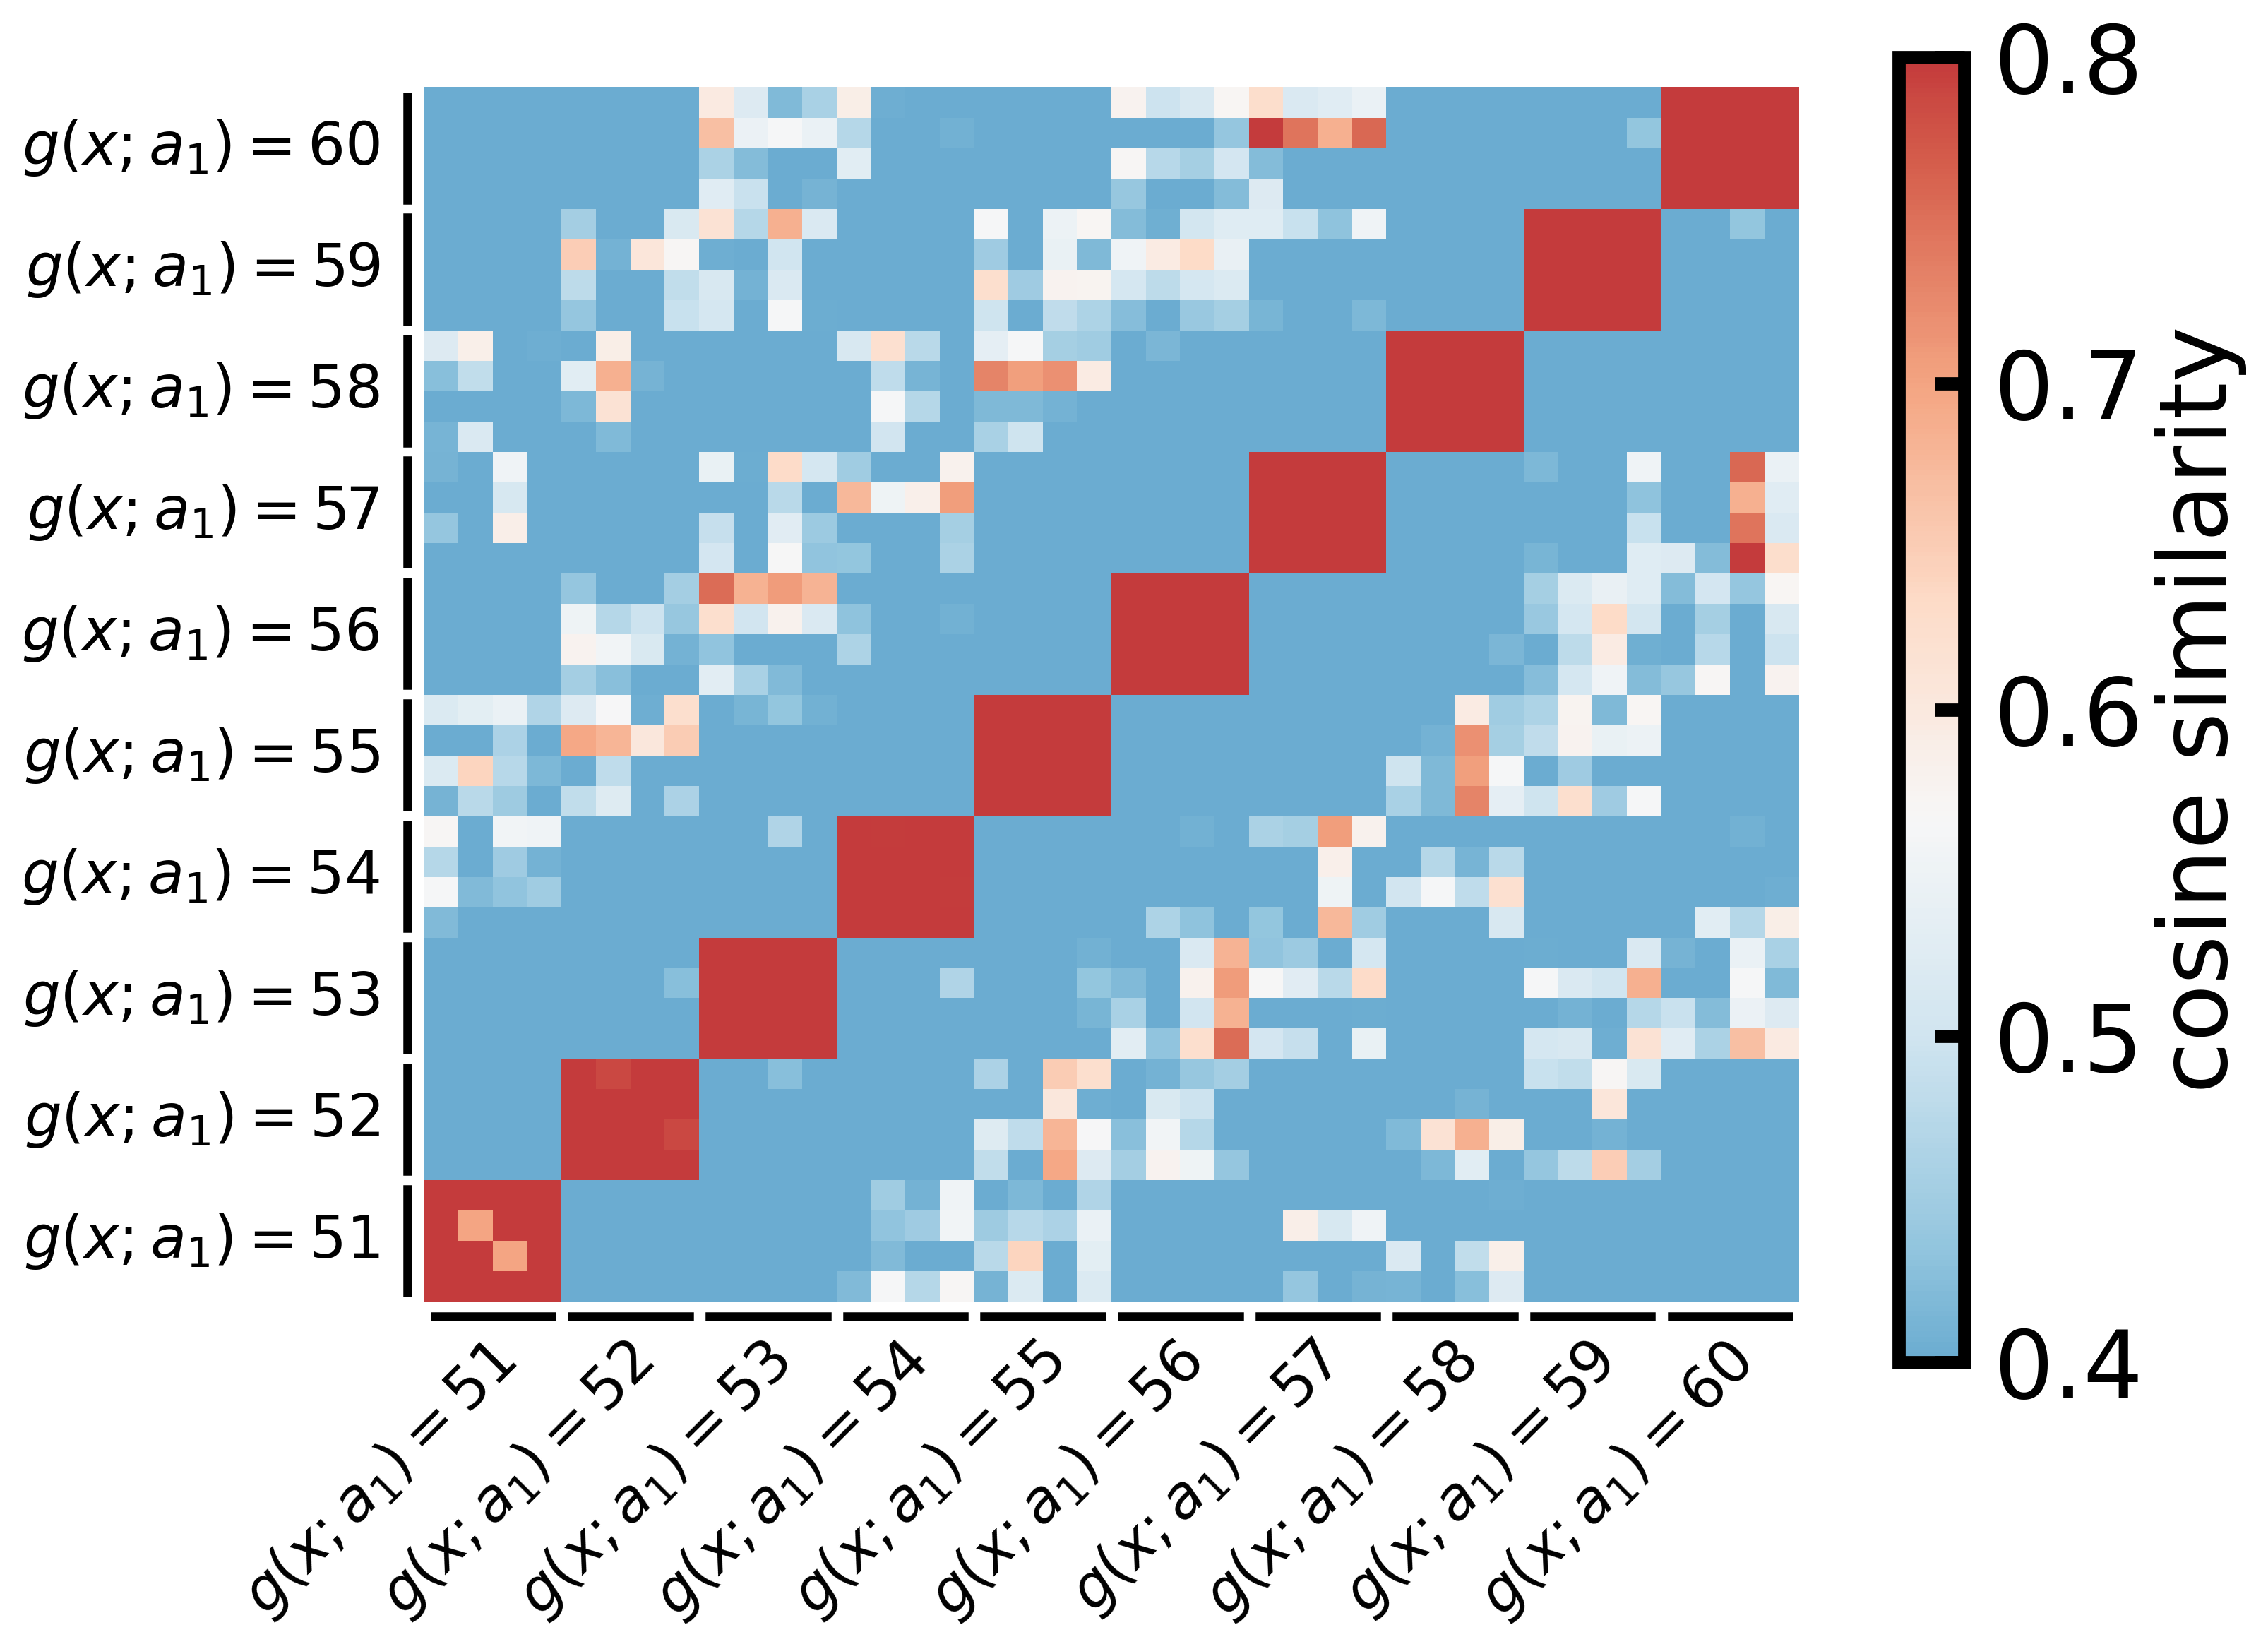

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap


format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=32, lw=6, ms=12.5, axlw=4.5, major_tick_len=10)

def truncate_colormap(cmap_name, min_val=0.25, max_val=0.75, n=100):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = LinearSegmentedColormap.from_list(
        f"trunc({cmap_name},{min_val:.2f},{max_val:.2f})",
        cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap


truncated_cmap = truncate_colormap('RdBu_r', min_val=0.25, max_val=0.85)

plt.figure(figsize=(10, 8))
plt.pcolor(similarity_matrix_emd[40:80, 40:80], cmap=truncated_cmap, vmin=0.4, vmax=0.8)


ax = plt.gca()

for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xlim(-2, 41)  
ax.set_ylim(-2, 41)


for i in range(10):
    y0 = i * 4+0.3
    y1 = (i + 1) * 4-0.3
    x = -0.5 

    ax.plot([x, x], [y0, y1], color='black', linewidth=3)

    ax.text(x - 0.8, (y0 + y1) / 2, f'$g(x;a_1)= {i + 51}$', ha='right', va='center', fontsize=20)
    

for i in range(10):
    x0 = i * 4+0.3
    x1 = (i + 1) * 4-0.3
    y = -0.5 

    ax.plot([x0, x1], [y, y], color='black', linewidth=3)

    ax.text( (x0 + x1) / 2 +1, y-0.5, f'$g(x;a_1)= {i + 51}$',ha='right', va='top', fontsize=20, rotation=45)


cbar = plt.colorbar(fraction=0.06, pad=0.04)
cbar.set_label('cosine similarity', fontsize=32)
cbar.ax.tick_params(labelsize=32)
# plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/large_ini_cos.png', bbox_inches='tight', dpi=300)

<Figure size 1920x1440 with 0 Axes>

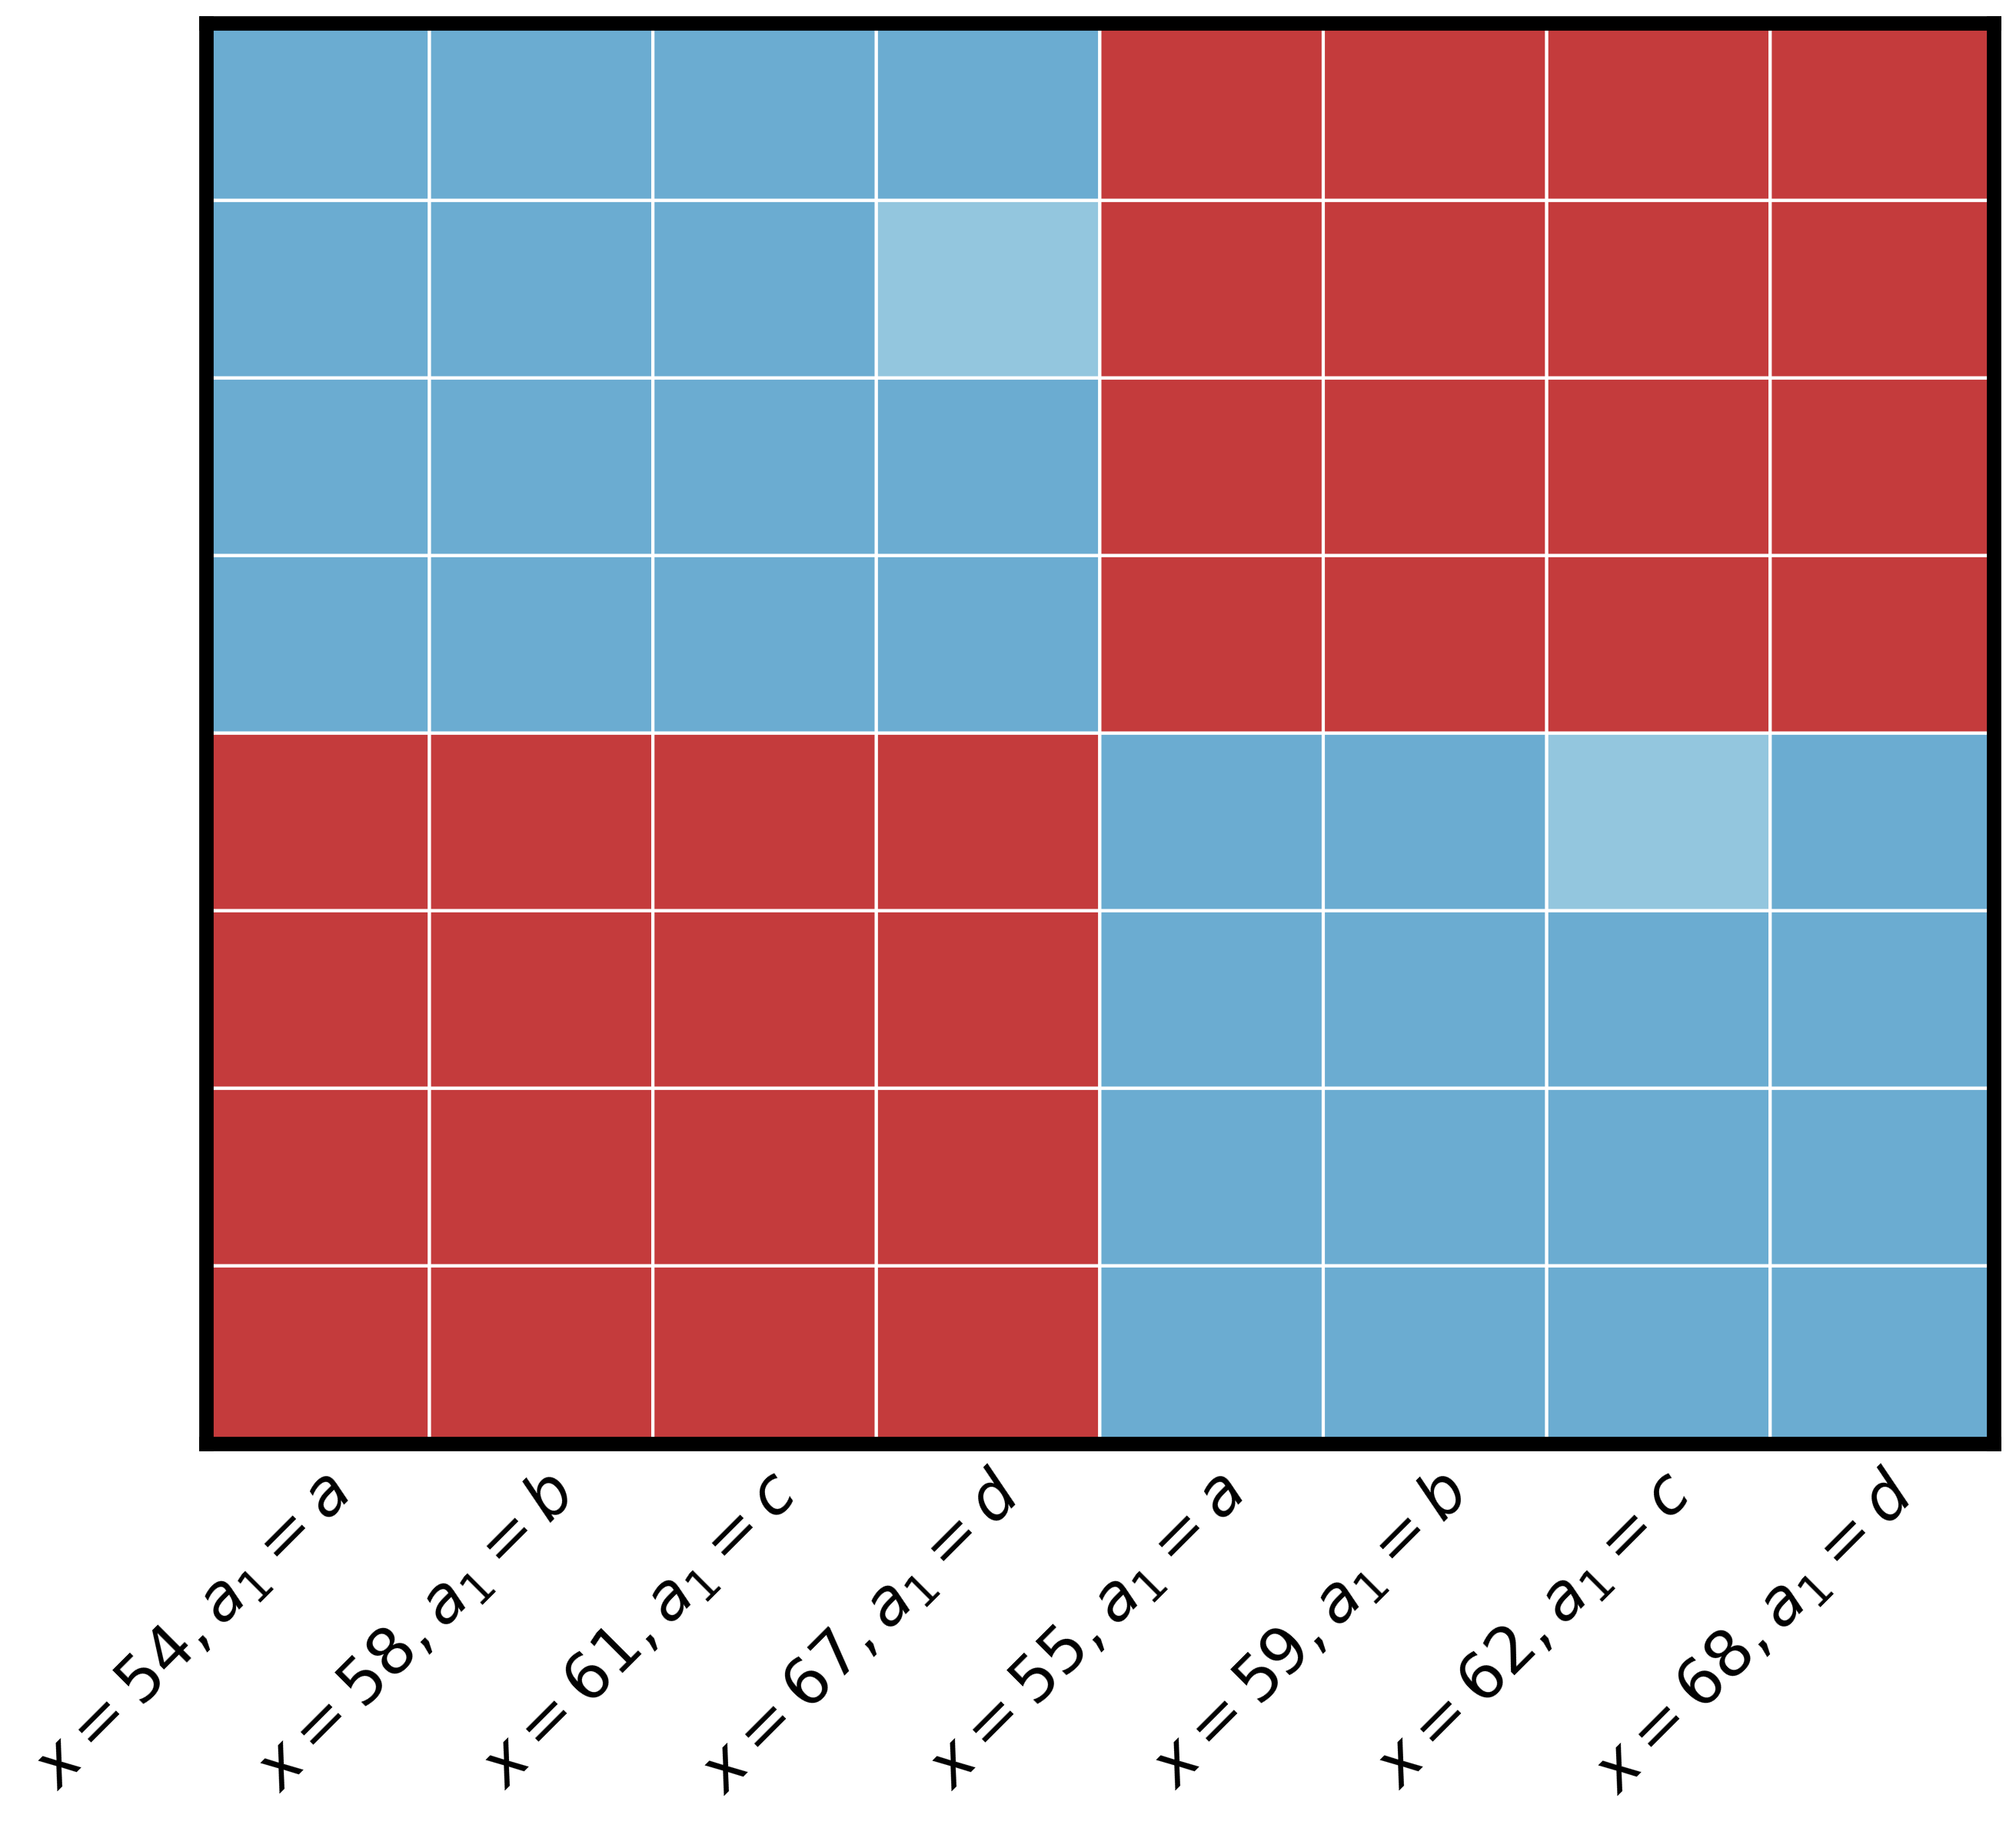

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

format_settings(wspace=0.4, hspace=0.6, bottom=0.16, fs=32, lw=6, ms=12.5, axlw=4.5, major_tick_len=10)

def truncate_colormap(cmap_name, min_val=0.25, max_val=0.75, n=100):
    cmap = plt.get_cmap(cmap_name)
    new_cmap = LinearSegmentedColormap.from_list(
        f"trunc({cmap_name},{min_val:.2f},{max_val:.2f})",
        cmap(np.linspace(min_val, max_val, n))
    )
    return new_cmap

truncated_cmap = truncate_colormap('RdBu_r', min_val=0.25, max_val=0.85)

plt.figure(figsize=(10, 8))
plt.pcolor(similarity_matrix_emd[72:80, 72:80], cmap=truncated_cmap, vmin=0.4, vmax=0.8, edgecolors='white', linewidths=1)

ax = plt.gca()



ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')


plot_lst=[]

for i in range(59,61):
    plot_lst.append([i-5, 'a'])
    plot_lst.append([i-1, 'b'])
    plot_lst.append([i+2, 'c'])
    plot_lst.append([i+8, 'd'])


for i in range(8):
    x0 = i 
    x1 = i + 1
    y=-0.1
    ax.text((x0 + x1) / 2+0.2, y, f'$x={plot_lst[i][0]}, a_1={plot_lst[i][1]}$', ha='right', va='top', fontsize=20, rotation=45)
#     ax.text( (x0 + x1) / 2 +1, y-0.5, f'$g(x;a_1)= {i + 51}$',ha='right', va='top', fontsize=20, rotation=45)

# rect = plt.Rectangle((32, 32), 8,8, linewidth=3, edgecolor='black', facecolor='none')
# ax.add_patch(rect)

# inset_ax = plt.axes([1, 0.2, 0.6, 0.6])
# inset_ax.pcolor(similarity_matrix_emd[72:80, 72:80], cmap=truncated_cmap, vmin=0.4, vmax=0.8)
# inset_ax.set_xticks([])
# inset_ax.set_yticks([])
# inset_ax.spines.values()
# for spine in inset_ax.spines.values():
#     spine.set_color('black')
#     spine.set_linewidth(2)
# inset_ax.set_title(f'$g(x;a)={59 + i}$', fontsize=18)

# cbar = plt.colorbar(fraction=0.06, pad=0.04)
# cbar.set_label('unseen anchors (OOD) acc', fontsize=32)
# cbar.ax.tick_params(labelsize=32)
plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/small_ini_cos_zoom_in.png', bbox_inches='tight', dpi=300)